In [180]:
import networkx as nx
import collections
import matplotlib.pyplot as plt



In [181]:
A = nx.Graph()

A.add_edges_from([(1, 2), (1, 3),(1, 4), (2, 4), (2, 5), (4,6)])


In [182]:
nx.average_clustering(A)

0.16666666666666666

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


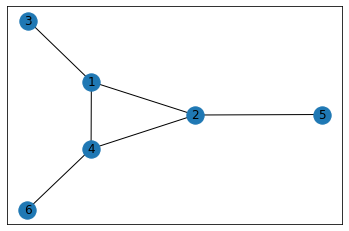

In [183]:
nx.draw_networkx(A)

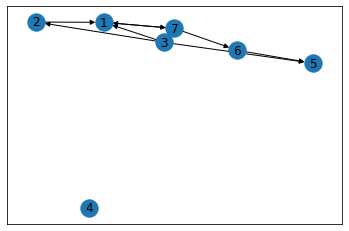

In [82]:
B = nx.DiGraph()
B.add_nodes_from([4])
B.add_edges_from([(1,7),(2,1),(3,1),(3,2),(3,5),(6,5),(7,1),(7,6)])
nx.draw_networkx(B)

Count the number of cycles of length 4 in both networks

In [197]:
#define a function which give the count of circle of graph to lenght 4
def count_cycle(graph):
#list of circle
    l=nx.find_cycle(graph,source=None,orientation='ignore')
#initialise c at 0
    c=0
#for loop and if loop for incremente 'c' if lenght of each element in l is 4
    for i in l:
        if len(i)==4:
            c+=1 
    return c

In [198]:
#count of circle of A to lenght 4
count_cycle(A)

0

In [199]:
#count of circle of B to lenght 4
count_cycle(B)

0

Text(0.5, 0, 'Degree-out')

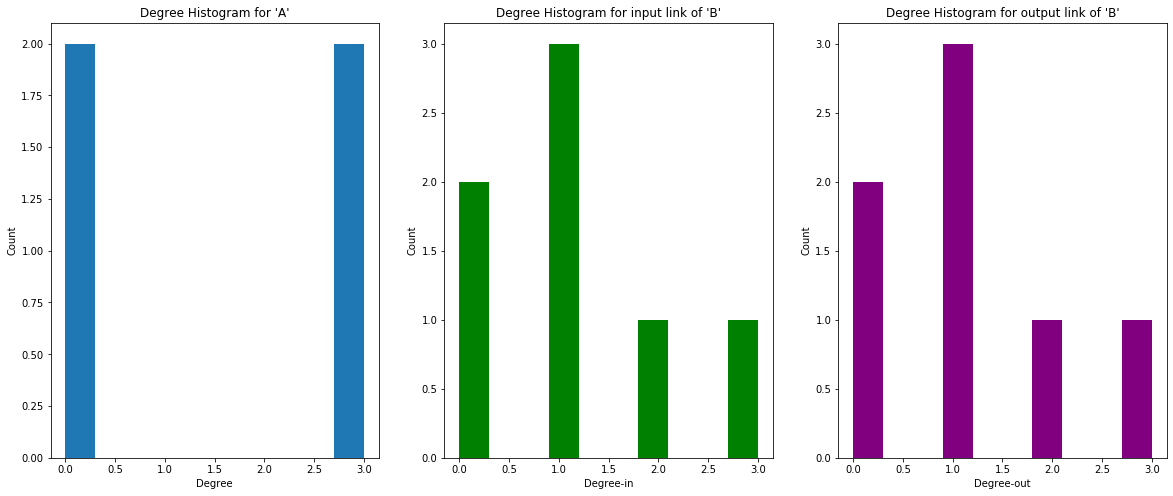

In [105]:
#list of degree of 'A'
H=nx.degree_histogram(A)
#node's indice and degree of input link of all the nodes
I=B.in_degree()
#node's indice and degree of output link of all the nodes
O=B.out_degree()
#split of 'I' for have node's indice and degree of each of them
degi, cnti = zip(*I)
#split of 'O' for have node's indice and degree of each of them
dego, cnto = zip(*O)
#put a count in form of list
i=list(cnti)
o=list(cnto)
#define the size of figure
plt.figure(figsize=(20,8))
#subplot for the trhee figures.
#the first is the degree distribution of 'A'
plt.subplot(1,3,1)
#plot histogram 
plt.hist(H)
#define title
plt.title("Degree Histogram for 'A'")
#label of y axes and x axes
plt.ylabel("Count")
plt.xlabel("Degree")
#the second is the degree distribution of 'A'
plt.subplot(1,3,2)
#plot histogram 
plt.hist(i, color='g')
#define title
plt.title("Degree Histogram for input link of 'B'")
#label of y axes and x axes
plt.ylabel("Count")
plt.xlabel("Degree-in")
#the third is the degree distribution of 'A'
plt.subplot(1,3,3)
#plot histogram 
plt.hist(o,color='purple')
#define title
plt.title("Degree Histogram for output link of 'B'")
#label of y axes and x axes
plt.ylabel("Count")
plt.xlabel("Degree-out")

In [138]:
from networkx.algorithms import bipartite

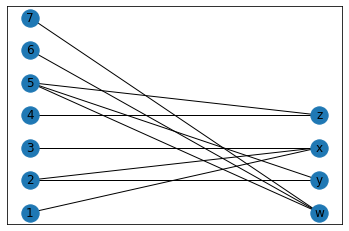

In [139]:
G = nx.Graph()
G.add_nodes_from([i for i in range(1,8)], bipartite=0)
G.add_nodes_from(['x', 'y', 'z','w'], bipartite=1)
G.add_edges_from([(1, 'x'),(2, 'x'),(2, 'y'),(3, 'x'),(4, 'z'),(5, 'y'),(5, 'z'),(5, 'w'),(6, 'w'),(7, 'w')])
v1, v2 = nx.bipartite.sets(G)
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(v1))
pos.update((node, (2, index)) for index, node in enumerate(v2))
nx.draw_networkx(G, pos=pos)
plt.show()

In [140]:
A=nx.adjacency_matrix(G)
print(A.todense())

[[0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]]


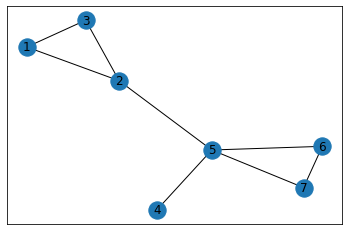

In [143]:
V1=bipartite.projected_graph(G,[i for i in range(1,8)])
nx.draw_networkx(V1)

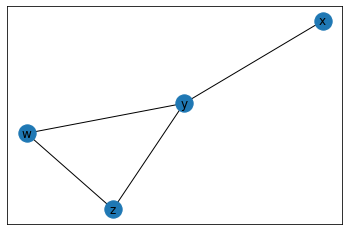

In [144]:
V2=bipartite.projected_graph(G,['x', 'y', 'z','w'])
nx.draw_networkx(V2)

In [145]:
A1=nx.adjacency_matrix(V1)
print(A1.todense())

[[0 1 1 0 0 0 0]
 [1 0 1 0 1 0 0]
 [1 1 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 1 0 1 1]
 [0 0 0 0 1 0 1]
 [0 0 0 0 1 1 0]]


In [146]:
A2=nx.adjacency_matrix(V2)
print(A2.todense())

[[0 1 0 0]
 [1 0 1 1]
 [0 1 0 1]
 [0 1 1 0]]


check of the average degree of the red nodes and the average degree of the yellow
nodes in the bipartite network

In [176]:
#node's indice and degree of V1 and V2
dV2,dV1=bipartite.degrees(G,[i for i in range(1,8)])
#split the node's indice and degree
indV1,degV1=zip(*dV1)
indV2,degV2=zip(*dV2)
#create two empty list
l1=0
l2=0
#summation of degrees of V1
for i in range (len(degV1)):
    l1+=a[i]
#summation of degrees of V2
for i in range (len(degV2)):
    l2+=b[i]
#We divise the summation with the total number for find average
average_V1=l1/4
average_V2=l2/7
#print the average degree of the yellow nodes and the average degree of the red nodes in the bipartite network
average_V1, average_V2

(2.5, 1.4285714285714286)